In [1]:
from viewLatex import viewLatex

In [2]:
def contact_vector(dw):
    x = 0
    y = 0
    vector = [dw.number_of_touch_points()]
    for i,step in enumerate(dw):
        if step == 1:
            y += 1
            d = y - x
            c = 0
            xx = x
            yy = y
            for k in range(i+1,len(dw)):
                dd = yy - xx
                if dd == d:
                    c+=1
                elif dd < d:
                    break
                xx, yy = (xx+1, yy) if dw[k] == 0 else (xx, yy+1)
            c -= 1
            vector.append(c)
            
        else:
            x += 1
    return vector[:-1]

def rise_vector(dw):
    vector = []
    r = 0
    for step in dw:
        if step == 0:
            vector.append(r)
            r = 0
        else:
            r+=1
    return vector

# The Rise contact involution on Tamari Intervals

**Viviane Pons** -- Sept,28 2018 -- CRM

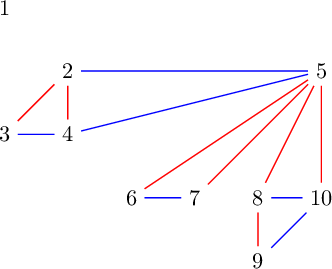

In [3]:
tip = TamariIntervalPoset(10, [(2,5), (3,4), (4,5), (6,7), (8,10), (9,10), (3,2), (4,2), (6,5), (7,5), (8,5), (10,5), (9,8)])
viewLatex(tip)

## The Tamari lattice

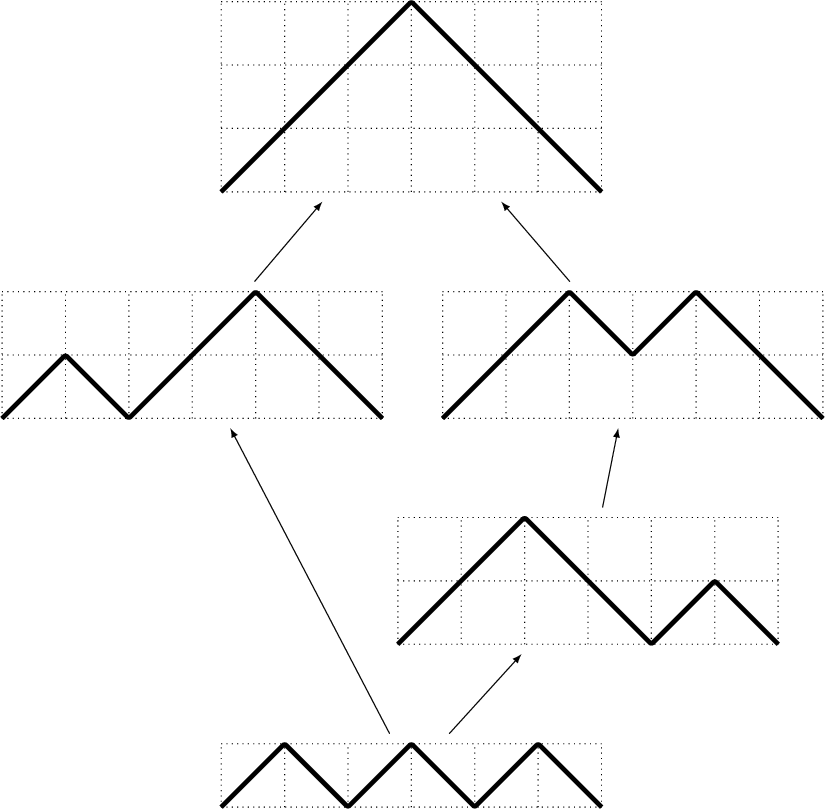

In [4]:
P = Poset({dw: [bt.to_dyck_word_tamari() for bt in dw.to_binary_tree_tamari().tamari_succ()] for dw in DyckWords(3)})
viewLatex(P)

## Some statistics on Dyck Paths

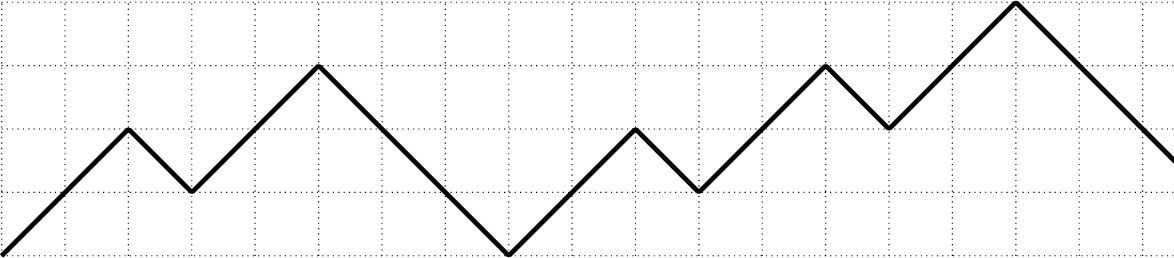

In [5]:
dw = DyckWord([1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,0,0,0])
viewLatex(dw)

In [6]:
def contact_partition(dw):
    v = contact_vector(dw)
    v.sort()
    v.reverse()
    return v

def rise_partition(dw):
    v = rise_vector(dw)
    v.sort()
    v.reverse()
    return v

In [7]:
dw = DyckWord([1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,0,0,0,0])
print (contact_vector(dw))
print (contact_partition(dw))

[2, 2, 0, 1, 0, 2, 0, 2, 0, 1]
[2, 2, 2, 2, 1, 1, 0, 0, 0, 0]


In [8]:
n = 3
sorted([[contact_partition(dw), rise_partition(dw)] for dw in DyckWords(n)]) == \
sorted([[rise_partition(dw), contact_partition(dw)] for dw in DyckWords(n)])

True

In [9]:
def involution(dw):
    return dw.reverse().to_binary_tree_tamari().left_right_symmetry().to_dyck_word_tamari().reverse()

In [10]:
n = 3
all(contact_partition(dw) == rise_partition(involution(dw)) for dw in DyckWords(n))

True

## Statistics on Tamari intervals

In [12]:
TIP3 = TamariIntervalPosets(3)
print(TIP3.cardinality())
[(tip.lower_dyck_word(), tip.upper_dyck_word()) for tip in TIP3]

13


[([1, 0, 1, 0, 1, 0], [1, 1, 1, 0, 0, 0]),
 ([1, 0, 1, 1, 0, 0], [1, 1, 1, 0, 0, 0]),
 ([1, 0, 1, 0, 1, 0], [1, 1, 0, 1, 0, 0]),
 ([1, 0, 1, 0, 1, 0], [1, 1, 0, 0, 1, 0]),
 ([1, 1, 0, 0, 1, 0], [1, 1, 1, 0, 0, 0]),
 ([1, 1, 1, 0, 0, 0], [1, 1, 1, 0, 0, 0]),
 ([1, 1, 0, 1, 0, 0], [1, 1, 1, 0, 0, 0]),
 ([1, 1, 0, 0, 1, 0], [1, 1, 0, 1, 0, 0]),
 ([1, 1, 0, 1, 0, 0], [1, 1, 0, 1, 0, 0]),
 ([1, 1, 0, 0, 1, 0], [1, 1, 0, 0, 1, 0]),
 ([1, 0, 1, 0, 1, 0], [1, 0, 1, 1, 0, 0]),
 ([1, 0, 1, 1, 0, 0], [1, 0, 1, 1, 0, 0]),
 ([1, 0, 1, 0, 1, 0], [1, 0, 1, 0, 1, 0])]

In [13]:
def contacts_interval(tip):
    return tip.lower_dyck_word().number_of_touch_points()

def rises_interval(tip):
    return tip.upper_dyck_word().number_of_initial_rises()

def contact_vector_interval(tip):
    return contact_vector(tip.lower_dyck_word())

def rise_vector_interval(tip):
    return rise_vector(tip.upper_dyck_word())

def contact_partition_interval(tip):
    return contact_partition(tip.lower_dyck_word())

def rise_partition_interval(tip):
    return rise_partition(tip.upper_dyck_word())

In [14]:
tip = TamariIntervalPoset(10, [(2,5), (3,4), (4,5), (6,7), (8,10), (9,10), (3,2), (4,2), (6,5), (7,5), (8,5), (10,5), (9,8)])

In [15]:
tip.lower_dyck_word()

[1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0]

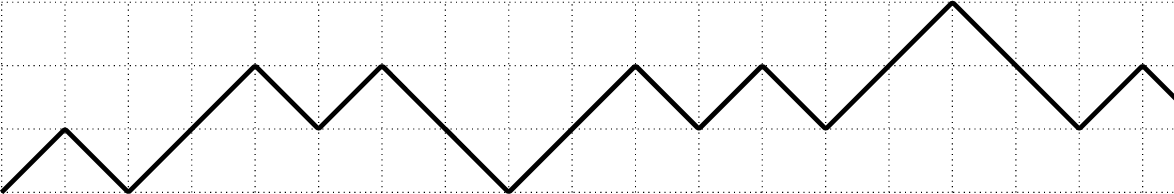

In [16]:
viewLatex(tip.lower_dyck_word())

In [17]:
tip.upper_dyck_word()

[1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0]

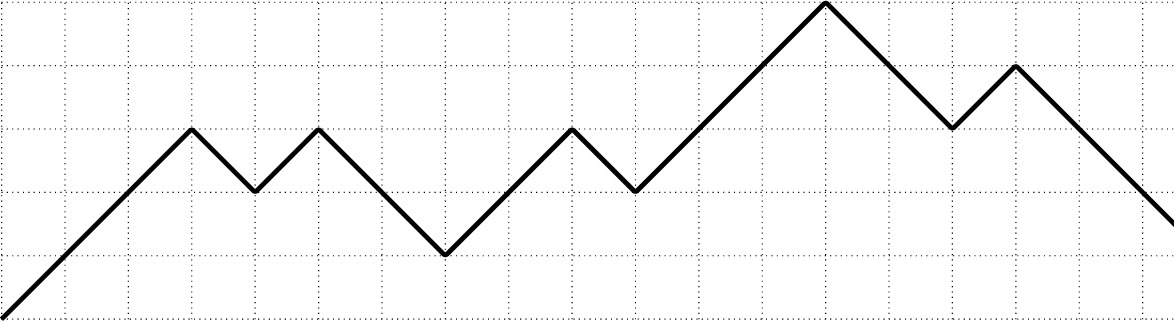

In [18]:
viewLatex(tip.upper_dyck_word())

In [19]:
contact_vector_interval(tip)

[3, 0, 2, 0, 0, 4, 0, 0, 1, 0]

In [20]:
contact_partition_interval(tip)

[4, 3, 2, 1, 0, 0, 0, 0, 0, 0]

In [21]:
rise_vector_interval(tip)

[3, 1, 0, 2, 3, 0, 1, 0, 0, 0]

In [22]:
rise_partition_interval(tip)

[3, 3, 2, 1, 1, 0, 0, 0, 0, 0]

In [23]:
n = 6
sorted([[contact_partition_interval(tip), rise_partition_interval(tip)] for tip in TamariIntervalPosets(n)]) == \
sorted([[rise_partition_interval(tip), contact_partition_interval(tip)] for tip in TamariIntervalPosets(n)])

True

## Tamari Interval-Posets

In [24]:
tip = TamariIntervalPoset(10, [(2,5), (3,4), (4,5), (6,7), (8,10), (9,10), (3,2), (4,2), (6,5), (7,5), (8,5), (10,5), (9,8)])

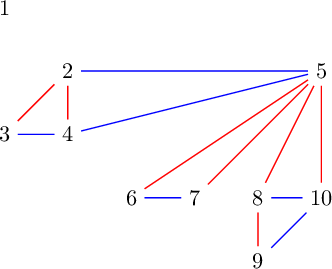

In [25]:
viewLatex(tip)

In [26]:
(tip.lower_dyck_word(), tip.upper_dyck_word())

([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0],
 [1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0])

In [27]:
def dc(tip):
    L = [len(tip.decreasing_children(i)) for i in tip]
    return [len(tip.decreasing_roots())] + L[:-1]

def ic(tip):
    L = [len(tip.increasing_children(i)) for i in tip]
    L.reverse()
    return [len(tip.increasing_roots())] + L[:-1]

In [28]:
print (dc(tip))
print (ic(tip))

[3, 0, 2, 0, 0, 4, 0, 0, 1, 0]
[4, 2, 0, 0, 1, 0, 2, 1, 0, 0]


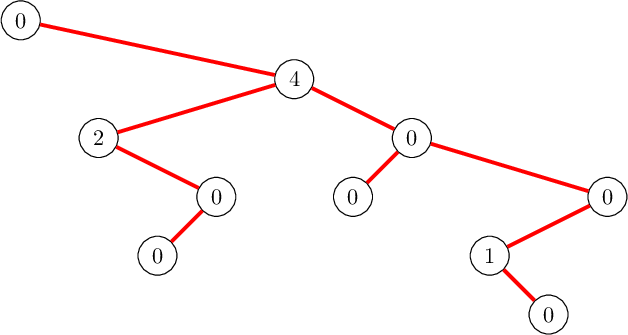

In [29]:
gt = tip.grafting_tree()
viewLatex(gt)

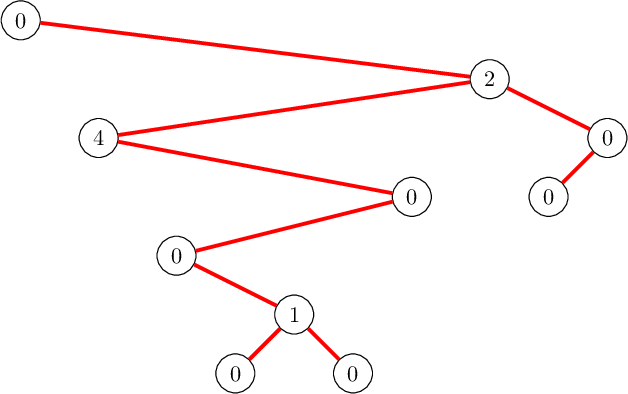

In [30]:
gt_im = gt.left_border_symmetry()
viewLatex(gt_im)

In [31]:
tip2 = TamariIntervalPosets.from_grafting_tree(gt_im)

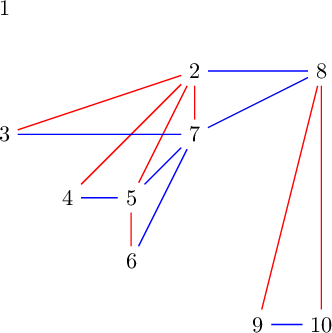

In [32]:
viewLatex(tip2)

In [33]:
print (dc(tip2))
print (ic(tip2))

[3, 0, 4, 0, 0, 1, 0, 0, 2, 0]
[3, 1, 0, 2, 3, 0, 1, 0, 0, 0]


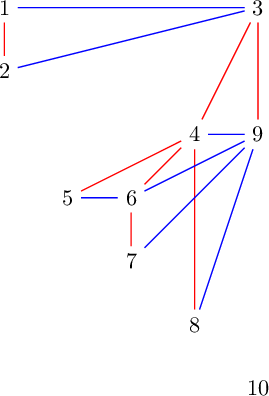

In [34]:
tip3 = tip2.complement()
viewLatex(tip3)

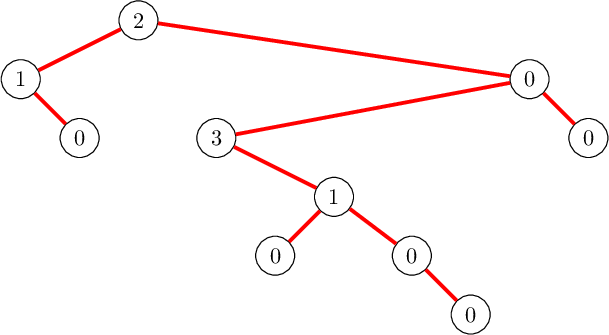

In [35]:
gt = tip3.grafting_tree()
viewLatex(gt)

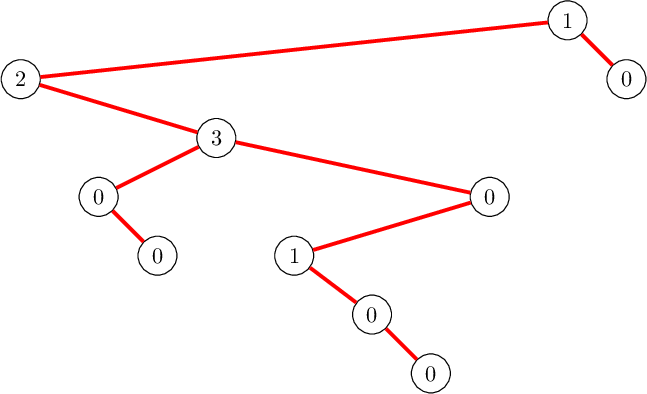

In [36]:
gt_im = gt.left_border_symmetry()
viewLatex(gt_im)

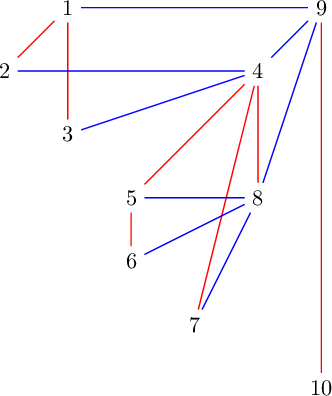

In [37]:
tip_im = TamariIntervalPosets.from_grafting_tree(gt_im)
viewLatex(tip_im)

In [38]:
print (contact_partition_interval(tip_im))
print (rise_partition_interval(tip_im))

[3, 3, 2, 1, 1, 0, 0, 0, 0, 0]
[4, 3, 2, 1, 0, 0, 0, 0, 0, 0]


In [39]:
print (contact_partition_interval(tip))
print (rise_partition_interval(tip))

[4, 3, 2, 1, 0, 0, 0, 0, 0, 0]
[3, 3, 2, 1, 1, 0, 0, 0, 0, 0]


In [44]:
tip.rise_contact_involution??

In [40]:
n = 3
all(contact_partition_interval(tip) == rise_partition_interval(tip.rise_contact_involution()) for tip in TamariIntervalPosets(n))

True